<h1> Python AVL (Athena Vortex Lattice) Tutorial and Demo </h1>

This notebook follows the following Youtube tutorial series from Benjamin Kelm:
https://www.youtube.com/watch?v=1ReGB8ai_PQ&t=101s

To demonstrate the Python AVL Wrapper created by Reno Elmendorp:
https://gitlab.com/relmendorp/avlwrapper/-/tree/master

Some notes: I did not include the special airfoil definitions Benjamin used. All airfoils used in this example are standard NACA


In [63]:
%matplotlib inline

import json
from math import radians, sqrt, tan
import avlwrapper as avl
import os

<h1>The airplane we are modeling (Sketch):<h1>


![Sketch](Graphic1.PNG)

<h1> Creating the geometry<h1>

Some important tips:
In AVL, the x-axis is defined rearwards towards tail of airplane. Y axis pointing along right wing. Z axis is pointing out of the screen

<h2>Wing Surface: Variable Definitions</h2>
The wing surface is broken up into 5 sections. The root, three middle sections, and an end section

In [23]:
S_ref = 0.239 # m^2, Wing surface area
B_ref = 1.5 # m, Reference Span
C_ref = S_ref / B_ref # Wing Reference Chord, area divided by reference span
mach_number = 0.0 # Mach number to run analysis at
# Moment Reference Location
Xref = 0.0
YRef = 0.0
ZRef = 0.0
moment_ref_pt = avl.Point(Xref, YRef, ZRef)

# Now start building the Surface
Nchord = 12 # Number of chordwise horshoe vortices placed on the surface
Cspace = avl.Spacing.cosine # Chordwise vortex spacing Parameter

Nspan = 20 # Number of spanwise horshoe vortices placed on the surface
Sspace = avl.Spacing.cosine # Spanwise vortex spacing parameter

# Reflect the Wing
y_duplicate = 0.0 # Reflect about the y=0 plane

# Twist angle bias for whole surface
twist_angle = 2.0

# Translate Bias
translate_bias = avl.Point(0.3, 0, 0) # 300 mm from the tip of nose

<h2>Wing Root Section</h2>

Now we will start building out the sections that make up the wing surface, starting with the root

In [24]:
# Start the sections, root chord section

# Define the leading edge position
wing_root_leading_edge = avl.Point(0.0, 0.0, 0.0)
wing_root_chord = 0.180
wing_root_angle = 0.0 # no twist

# Define what airfoil is used for this section
wing_root_airfoil = avl.NacaAirfoil('2412')

# Define a control surface
flap_cgain = 1.0 # No mixing of controls
flap_xhinge = 0.72 # Relative location of the hinge
flap_sgndup = 1.0 # Duplicate sign
flap_hingevec = avl.Point(0.0, 1.0, 0.0)# Axis which the surface rotates about

flap = avl.Control(
    name='flap',
    gain=flap_cgain,
    x_hinge=flap_xhinge,
    duplicate_sign=flap_sgndup,
    hinge_vector=flap_hingevec
)
# Now put together the section
wing_root_section = avl.Section(
    leading_edge_point= wing_root_leading_edge,
    chord=wing_root_chord,
    airfoil=wing_root_airfoil,
    controls=[flap]
)

<h2> Section 2 of the Wing (Aileron) </h2>

In [25]:
# Start the sections, Section 2
# Define the leading edge position
section2_leading_edge = avl.Point(0.0, 0.450, 0.0)
section2_chord = 0.180
section2_angle = 0.0 # no twist

# Define what airfoil is used for this section
section2_airfoil = avl.NacaAirfoil('2412')

# Define a control surface
flap2_cgain = 1.0 # No mixing of controls
flap2_xhinge = 0.72 # Relative location of the hinge
flap2_sgndup = 1.0 # Duplicate sign
flap2_hingevec = avl.Point(0.0, 1.0, 0.0) # Axis which the surface rotates about

# Another flap
flap2 = avl.Control(
    name='flap',
    gain=flap2_cgain,
    x_hinge=flap2_xhinge,
    duplicate_sign=flap2_sgndup,
    hinge_vector=flap2_hingevec
)

# Define a control surface (Aileron)
ail_cgain = 1.0 # No mixing of controls
ail_xhinge = 0.72 # Relative location of the hinge
ail_sgndup = -1.0 # Duplicate sign, ailerons deflect anti-symmetrically
ail_hingevec = avl.Point(0.0, 1.0, 0.0) # Axis which the surface rotates about

ail = avl.Control(
    name='aileron',
    gain=ail_cgain,
    x_hinge=ail_xhinge,
    duplicate_sign=ail_sgndup,
    hinge_vector=ail_hingevec
)
# Now put together the section
section2 = avl.Section(
    leading_edge_point= section2_leading_edge,
    chord=section2_chord,
    airfoil=section2_airfoil,
    controls=[flap2, ail]
)

<h2> Section 3 of the Wing: Aileron (cont.) </h2>

In [26]:
# Start the sections, Section 3
# Define the leading edge position
section3_leading_edge = avl.Point(0.060, 0.650, 0.0)
section3_chord = 0.120
section3_angle = 0.0 # no twist

# Define what airfoil is used for this section
section3_airfoil = avl.NacaAirfoil('2412')

# Define a control surface (Aileron)
ail2_cgain = 1.0 # No mixing of controls
ail2_xhinge = 0.72 # Relative location of the hinge
ail2_sgndup = -1.0 # Duplicate sign, ailerons deflect anti-symmetrically
ail2_hingevec = avl.Point(0.0, 1.0, 0.0) # Axis which the surface rotates about

ail2 = avl.Control(
    name='aileron',
    gain=ail2_cgain,
    x_hinge=ail2_xhinge,
    duplicate_sign=ail2_sgndup,
    hinge_vector=ail2_hingevec
)

# Now put together the section
section3 = avl.Section(
    leading_edge_point= section3_leading_edge,
    chord=section3_chord,
    airfoil=section3_airfoil,
    controls=[ail2]
)

<h2> Section 4 of the Wing: End Section </h2>

In [27]:
# Section 4: End Section
# Define the leading edge position
section4_leading_edge = avl.Point(0.130, 0.750, 0.0)
section4_chord = 0.050
section4_angle = 0.0 # no twist

# Define what airfoil is used for this section
section4_airfoil = avl.NacaAirfoil('2412')

# Now put together the section
section4 = avl.Section(
    leading_edge_point= section4_leading_edge,
    chord=section4_chord,
    airfoil=section4_airfoil
)

<h2> Assemble Wing Surface Object </h2>

In [28]:
wing = avl.Surface(
    name='wing',
    n_chordwise=Nchord,
    chord_spacing=Cspace,
    n_spanwise=Nspan,
    span_spacing=Sspace,
    y_duplicate=y_duplicate,
    sections=[wing_root_section, section2, section3, section4],
    translation=translate_bias, 
    angle=twist_angle,
)

<h2>Horizontal Stabilizer Surface: Variable Definitions and Surface Assembly</h2>
We move onto the Horizontal Stabilizer (HT) Surface. This section of the code is enclosed in one block:

In [29]:
ht_Nchord = 8.0
ht_Cspace = avl.Spacing.cosine
ht_Nspan = 5.0
ht_Sspace = avl.Spacing.cosine
ht_y_duplicate = 0.0
ht_angle = -2.0 # Degrees
# Translate local coordinate system to leading edge of ht
ht_translate_bias = avl.Point(1.0, 0, 0.175) 


# Begin the first section (Inner)
ht_section1_leading_edge = avl.Point(0.0, 0.0, 0.0)
ht_section1_chord = 0.1
ht_section1_angle = 0.0

ht_section1_airfoil = avl.NacaAirfoil('0010')

# Define elevator
ele_cgain = 1.0 # No mixing of controls
ele_xhinge = 0.7 # Relative location of the hinge
ele_sgndup = 1.0 # Duplicate sign, ailerons deflect anti-symmetrically
ele_hingevec = avl.Point(0.0, 1.0, 0.0) # Axis which the surface rotates about
ele = avl.Control(
    name='elevator',
    gain=ele_cgain,
    x_hinge=ele_xhinge,
    duplicate_sign=ele_sgndup,
    hinge_vector=ele_hingevec
)

# Now put together the section
ht_section1 = avl.Section(
    leading_edge_point= ht_section1_leading_edge,
    chord=ht_section1_chord,
    airfoil=ht_section1_airfoil,
    controls=[ele]
)

# Section 2 (Middle)
ht_section2_leading_edge = avl.Point(0.0, 0.220, 0.0)
ht_section2_chord = 0.100
ht_section2_angle = 0.0

ht_section2_airfoil = avl.NacaAirfoil('0010')
# Now put together the section
ht_section2 = avl.Section(
    leading_edge_point= ht_section2_leading_edge,
    chord=ht_section2_chord,
    airfoil=ht_section2_airfoil,
    controls=[ele]
)

# Section 3 (End Section)
ht_section3_leading_edge = avl.Point(0.070, 0.3, 0.0)
ht_section3_chord = 0.030
ht_section3_angle = 0.0

ht_section3_airfoil = avl.NacaAirfoil('0010')
# Now put together the section
ht_section3 = avl.Section(
    leading_edge_point= ht_section3_leading_edge,
    chord=ht_section3_chord,
    airfoil=ht_section3_airfoil,
    controls=[ele]
)

# Assemble HT
ht = avl.Surface(
    name='horizontal_tail',
    n_chordwise=ht_Nchord,
    chord_spacing=ht_Cspace,
    n_spanwise=ht_Nspan,
    span_spacing=ht_Sspace,
    y_duplicate=ht_y_duplicate,
    sections=[ht_section1, ht_section2, ht_section3],
    translation=ht_translate_bias, 
    angle=ht_angle,
)


<h2>Rudder Surface: Variable Definition and Surface Assembly </h2>

In [30]:
# Modeling the Rudder/V-Stab now
vt_Nchord = 8.0
vt_Cspace = avl.Spacing.cosine
vt_Nspan = 10.0
vt_Sspace = avl.Spacing.cosine
# Translate local coordinate system to leading edge of vt
vt_translate_bias = avl.Point(0.950, 0, 0.0) 

vt_y_duplicate=0.0

# Begin the first section of vt (lower)
vt_section1_leading_edge = avl.Point(0.0, 0.0, 0.0)
vt_section1_chord = 0.150
vt_section1_angle = 0.0

vt_section1_airfoil = avl.NacaAirfoil('0010')

# Define Rudder
rud_cgain = 1.0 # No mixing of controls
rud_xhinge = 0.67 # Relative location of the hinge
rud_sgndup = 1.0 # Duplicate sign, ailerons deflect anti-symmetrically
rud_hingevec = avl.Point(0.0, 0.0, 1.0) # Axis which the surface rotates about
rud = avl.Control(
    name='rudder',
    gain=rud_cgain,
    x_hinge=rud_xhinge,
    duplicate_sign=rud_sgndup,
    hinge_vector=rud_hingevec
)

# Now put together the section
vt_section1 = avl.Section(
    leading_edge_point= vt_section1_leading_edge,
    chord=vt_section1_chord,
    airfoil=vt_section1_airfoil,
    controls=[rud]
)

# Section 2 of V-Stab (Upper)
vt_section2_leading_edge = avl.Point(0.070, 0.0, 0.300)
vt_section2_chord = 0.080
vt_section2_angle = 0.0

vt_section2_airfoil = avl.NacaAirfoil('0010')

vt_section2 = avl.Section(
    leading_edge_point=vt_section2_leading_edge,
    chord=vt_section2_chord,
    airfoil=vt_section2_airfoil,
    controls=[rud]
)

# Assemble VT
vt = avl.Surface(
    name='vertial_tail',
    n_chordwise=vt_Nchord,
    chord_spacing=vt_Cspace,
    n_spanwise=vt_Nspan,
    span_spacing=vt_Sspace,
    y_duplicate=vt_y_duplicate,
    sections=[vt_section1, vt_section2],
    translation=vt_translate_bias, 
)



<h1> Final Geometry Object Creation </h1>
We finally generate the geometry object, then start an AVL session to view the object. We also output this geometry object as a .AVL input file

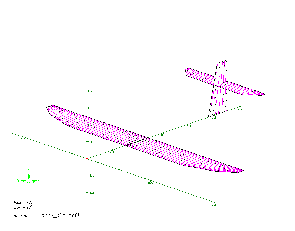

In [34]:
# make geometry final object
aircraft = avl.Geometry(
    name='bens_aircraft',
    reference_area=S_ref,
    reference_chord=C_ref,
    reference_span=B_ref,
    reference_point=moment_ref_pt,
    mach=mach_number,
    surfaces=[wing, ht, vt]
)

# Plot Geometry
# create a session with only the geometry
session = avl.Session(geometry=aircraft)

# check if we have ghostscript (to show the image inline the notebook)
if 'gs_bin' in session.config.settings:
    img = session.save_geometry_plot()[0]
    avl.show_image(img)
else:
    session.show_geometry()
# Show Geometry using AVL as well
session.show_geometry()
# output the Geometry file
target_dir = os.getcwd()
session._write_geometry(target_dir)


<h1> Case Analysis </h1>
In this section we will define the run case files (.run), using mass input files (.mass), and generating some calculations

In [47]:
# create a function for showing the Trefftz plot, since we'll be using it more often
def show_treffz(session):
    for idx, _ in enumerate(session.cases):
        session.show_trefftz_plot(idx+1) # cases start from 1



# Case 1: Trim Pitch Moment to 0 using Elevator (bensAirplane_run1)
trim_param = avl.Parameter(name='elevator', setting='Cm', value= 0.0)
alpha = 10.0
trim_case1= avl.Case(
    name='trim_elevator_cm',
    alpha=alpha,
    elevator=trim_param)

# Case 2: Landing Configuration
# For landing we want to trim with a very high Cl
# So we change alpha to achieve a Cl of 1.2
cl = 1.2
cl_param = avl.Parameter(name='alpha', setting='CL', value=cl)
# Lets also say the flaps should be 20 degrees
flaps_deg = 20.0 # degrees
trim_case2 = avl.Case(
    name='landingConfig',
    alpha=cl_param,
    flap=flaps_deg,
    elevator=trim_param)

# Case 3: Banked Flight
cl = 0.4
beta = 0
bank_angle = 20.0 # Degrees
cm = 0.0
cm_param = avl.Parameter(name='elevator', setting='Cm', value=cm)
cl_param = avl.Parameter(name='alpha', setting='CL', value=cl)
trim_case3 = avl.Case(
    name='bankedFlight',
    alpha = cl_param,
    beta = beta,
    bank = bank_angle,
    elevator = cm_param)





<h2> Start an AVL session with our geometry and run cases</h2>

We'll plot the treffz diagrams as well as export the results into a JSON file

In [64]:
session = avl.Session(geometry=aircraft, cases=[trim_case1, trim_case2, trim_case3])

show_treffz(session)

# results are in a dictionary
result = session.run_all_cases()

# Print some data from the dictionary
print("Case 1 CL = {}".format(result['trim_elevator_cm']['Totals']['CLtot']))
print("Case 2 CL = {}".format(result['landingConfig']['Totals']['CLtot']))
print("Case 3 CL = {}".format(result['bankedFlight']['Totals']['CLtot']))
# Will export geometry and run files from the session (Generates them under the bens_aircraft folder)
session.export_run_files() 

# Write results to a JSON file
dir_name = os.getcwd()
output_filename = "results.json"
aircraft_name = "bens_aircraft"
target_file = os.path.join(dir_name, aircraft_name)
target_file = os.path.join(target_file, output_filename)
print(target_file)
with open(target_file, 'w') as f:
    f.write(json.dumps(result))


Case 1 CL = 0.78959
Case 2 CL = 1.2
Case 3 CL = 0.4
Input files written to: c:\Users\brian\Documents\AeroEngrX\AVL_Tutorial\bens_aircraft
c:\Users\brian\Documents\AeroEngrX\AVL_Tutorial\bens_aircraft\results.json


<h2> Transition into using AVL for furthur analysis </h2>

Currently, AVLWrapper does not support mass input files, eigenmode analysis, or time domain analysis. For mass definition it's possible to define such information in the case object itself, or a mass definition file can be written manually as followed by the tutorial. 

An input sequence file is generated to ease the workflow, the list of commands can be copy and pasted into the AVL terminal as necessary


In [66]:

dir_name = os.getcwd()
output_filename = "InputSequence.txt"
aircraft_name = "bens_aircraft"

target_file = os.path.join(dir_name, aircraft_name)
target_file = os.path.join(target_file, output_filename)
print(target_file)


commands = [] # Python list
commands.append("load")
commands.append("case")
commands.append("mass")
commands.append("mset") # To Apply the Mass file data to the run case
commands.append("oper") # To change to the operating menu
commands.append("m") # To check if the mass file was applied correctly we can type m check or modify the parameters

with open(target_file, "w") as output:
    for cmd in commands:
        # If the command is one of the following, append on the file name
        if cmd == "load" or cmd == "case" or cmd == "mass":
            output.write(cmd + " " + aircraft_name + '\n')
        else:
            # Otherwise write the command directly
            output.write(cmd + '\n')

c:\Users\brian\Documents\AeroEngrX\AVL_Tutorial\bens_aircraft\InputSequence.txt
